In [15]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, roc_curve, roc_auc_score,log_loss,classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder,MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, LogisticRegression, LinearRegression
from sklearn.compose import make_column_transformer, make_column_selector
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree



In [17]:
satellite = pd.read_csv("Satellite.csv",sep=';')

In [19]:
satellite.columns

Index(['x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7', 'x.8', 'x.9', 'x.10',
       'x.11', 'x.12', 'x.13', 'x.14', 'x.15', 'x.16', 'x.17', 'x.18', 'x.19',
       'x.20', 'x.21', 'x.22', 'x.23', 'x.24', 'x.25', 'x.26', 'x.27', 'x.28',
       'x.29', 'x.30', 'x.31', 'x.32', 'x.33', 'x.34', 'x.35', 'x.36',
       'classes'],
      dtype='object')

In [21]:
satellite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 37 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   x.1      6435 non-null   int64 
 1   x.2      6435 non-null   int64 
 2   x.3      6435 non-null   int64 
 3   x.4      6435 non-null   int64 
 4   x.5      6435 non-null   int64 
 5   x.6      6435 non-null   int64 
 6   x.7      6435 non-null   int64 
 7   x.8      6435 non-null   int64 
 8   x.9      6435 non-null   int64 
 9   x.10     6435 non-null   int64 
 10  x.11     6435 non-null   int64 
 11  x.12     6435 non-null   int64 
 12  x.13     6435 non-null   int64 
 13  x.14     6435 non-null   int64 
 14  x.15     6435 non-null   int64 
 15  x.16     6435 non-null   int64 
 16  x.17     6435 non-null   int64 
 17  x.18     6435 non-null   int64 
 18  x.19     6435 non-null   int64 
 19  x.20     6435 non-null   int64 
 20  x.21     6435 non-null   int64 
 21  x.22     6435 non-null   int64 
 22  

In [23]:
y = satellite['classes']
X = satellite.drop('classes',axis = 1)

In [49]:
y.head()

0    grey soil
1    grey soil
2    grey soil
3    grey soil
4    grey soil
Name: classes, dtype: object

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=24,test_size=0.3,stratify=y)

In [37]:
dtc = DecisionTreeClassifier( random_state = 24)


params = {'min_samples_split':[2,10,25,50],
          'min_samples_leaf':[1,10,25,50],
          'max_depth':[None,4,6]
         }
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 24)
gcv = GridSearchCV(dtc,param_grid = params,scoring = 'neg_log_loss',
                   cv = kfold, verbose = 3)




In [53]:
gcv.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-5.641 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-6.001 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-5.241 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-5.921 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-5.647 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=-3.361 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=-4.480 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=-3.723 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=-4.265 total time=   0.0s
[CV 5/5

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'max_depth': [None, 4, 6],
                         'min_samples_leaf': [1, 10, 25, 50],
                         'min_samples_split': [2, 10, 25, 50]},
             scoring='neg_log_loss', verbose=3)

In [55]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 50}
-0.6884839784530963


In [57]:
gcv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_split=50, random_state=24)

In [93]:
best_model = gcv.best_estimator_

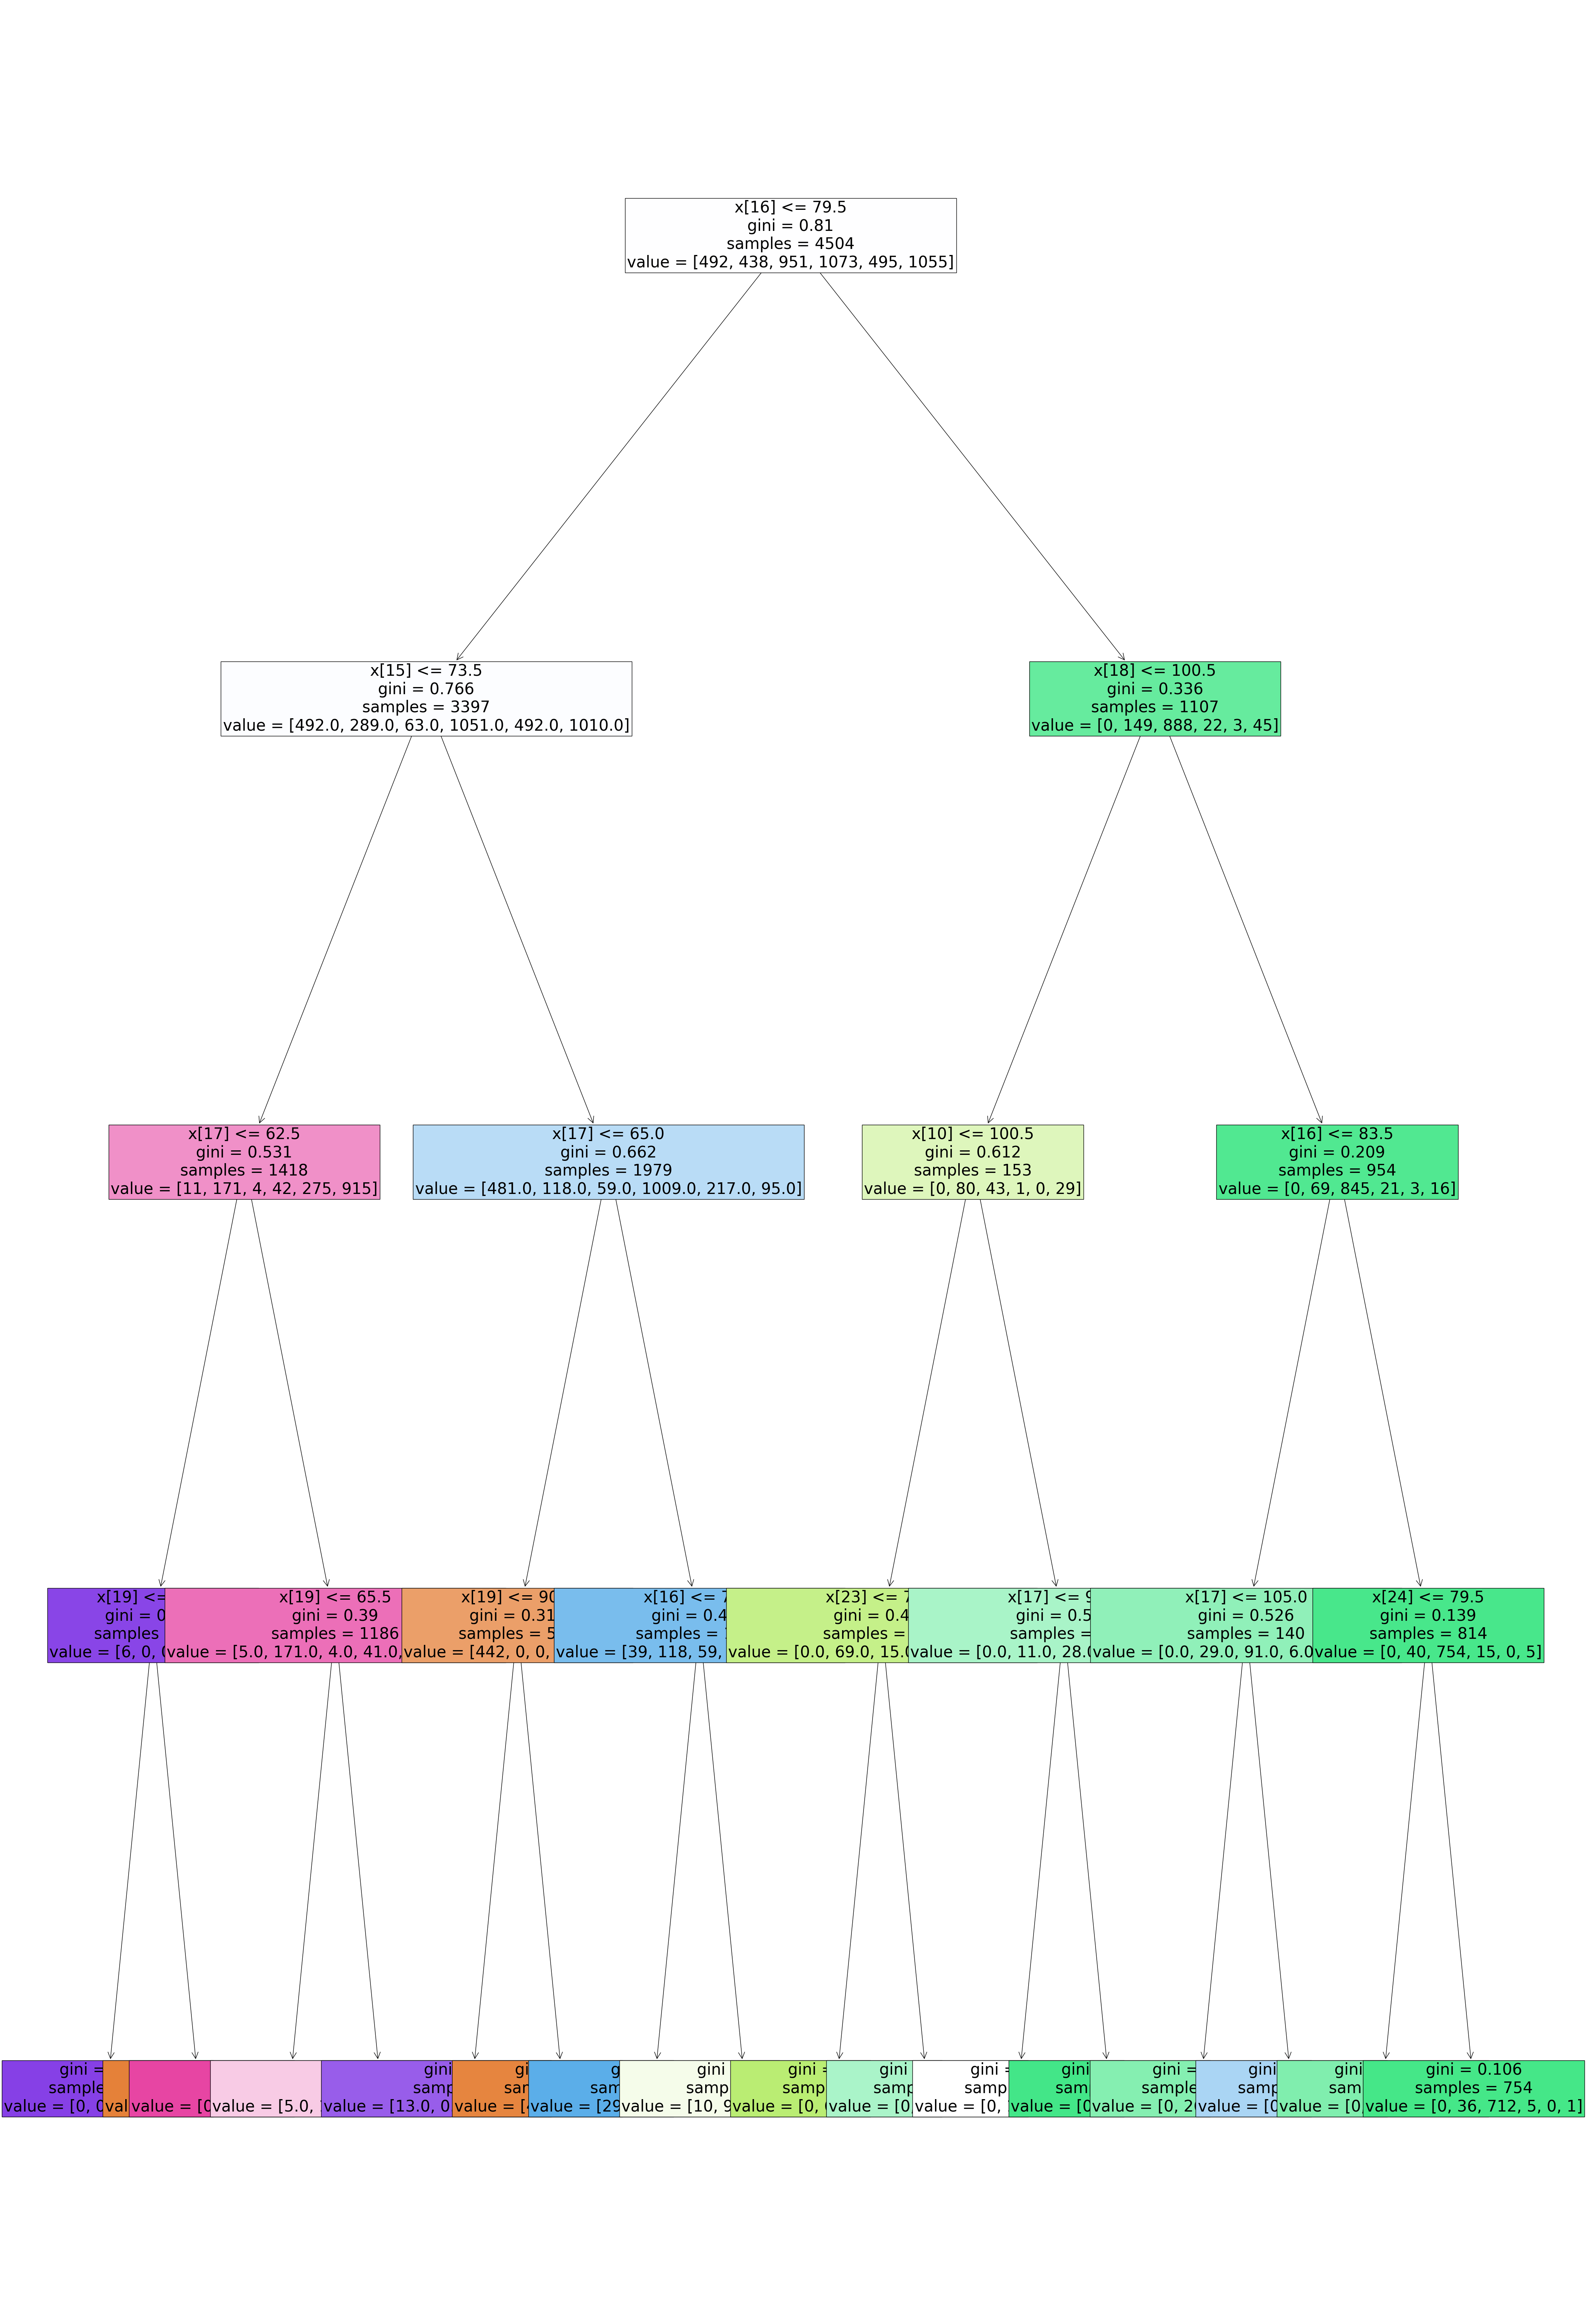

In [61]:

plt.figure(figsize=(50,80))
plot_tree(best_model, filled = True, fontsize= 30)
plt.show()

In [65]:
#best_tree_model = gcv.best_estimator_

In [79]:
df_imp = pd.DataFrame({'feature':list(X.columns),
             'importance': best_model.feature_importances_})

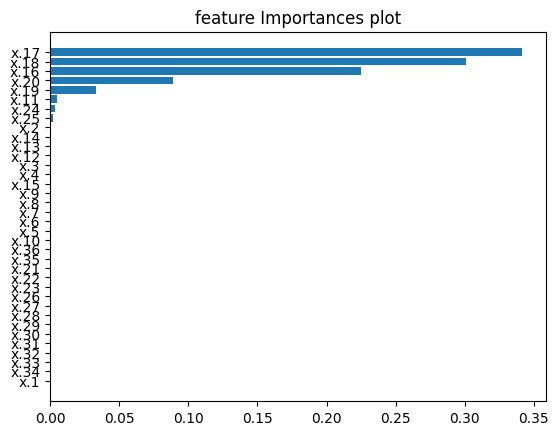

In [81]:
df_imp.sort_values('importance', inplace = True)
plt.barh(df_imp['feature'],df_imp['importance'])
plt.title("feature Importances plot")
plt.show()

In [99]:
best_model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00525371, 0.        , 0.        , 0.        , 0.        ,
       0.22510563, 0.34171741, 0.3006376 , 0.03288085, 0.08888934,
       0.        , 0.        , 0.        , 0.00343406, 0.0020814 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [120]:
# Get feature importances
importances = best_model.feature_importances_

# Create a DataFrame for feature importances and their corresponding feature names
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features based on importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature names with their importances
print(importance_df)

   Feature  Importance
16    x.17    0.341717
17    x.18    0.300638
15    x.16    0.225106
19    x.20    0.088889
18    x.19    0.032881
10    x.11    0.005254
23    x.24    0.003434
24    x.25    0.002081
31    x.32    0.000000
30    x.31    0.000000
29    x.30    0.000000
28    x.29    0.000000
27    x.28    0.000000
21    x.22    0.000000
26    x.27    0.000000
25    x.26    0.000000
32    x.33    0.000000
33    x.34    0.000000
34    x.35    0.000000
22    x.23    0.000000
0      x.1    0.000000
20    x.21    0.000000
1      x.2    0.000000
14    x.15    0.000000
13    x.14    0.000000
12    x.13    0.000000
11    x.12    0.000000
9     x.10    0.000000
8      x.9    0.000000
7      x.8    0.000000
6      x.7    0.000000
5      x.6    0.000000
4      x.5    0.000000
3      x.4    0.000000
2      x.3    0.000000
35    x.36    0.000000
